In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dabl

Data wrangling

1 import packages
2 load data 
3 join data on school code 

4 observe nulls and remove - found "*  " so need to convert data types after dealing with special characters

In [171]:
dfs = pd.read_csv('sb_ca2021_1_csv_v2.txt' ,delimiter = "^")
dfs.drop('Filler',axis=1,inplace=True)
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100251 entries, 0 to 100250
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   County Code                                  100251 non-null  int64 
 1   District Code                                100251 non-null  int64 
 2   School Code                                  100251 non-null  int64 
 3   Test Year                                    100251 non-null  int64 
 4   Student Group ID                             100251 non-null  int64 
 5   Test Type                                    100251 non-null  object
 6   Total Tested at Reporting Level              100251 non-null  object
 7   Total Tested with Scores at Reporting Level  100251 non-null  object
 8   Grade                                        100251 non-null  int64 
 9   Test ID                                      100251 non-null  int64 
 

In [172]:
dfs['Test ID'].unique()

array([1, 2])

In [173]:
# convert test types to name 
dfs['Test ID'] = dfs['Test ID'].map({1:'English Language Arts/Literacy',2:'Mathematics'})
dfs['Test ID'].unique()

array(['English Language Arts/Literacy', 'Mathematics'], dtype=object)

In [181]:
## unclear on this column atm 

dfs['Type ID'].value_counts()

7     73529
6     13504
9      9154
10     3122
5       926
4        16
Name: Type ID, dtype: int64

In [182]:
dfs.head()

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
0,0,0,0,2021,1,B,743626,736192,3,English Language Arts/Literacy,...,12.98,50.72,36.30,10.49,71.78,17.72,16.57,61.65,21.77,4
1,0,0,0,2021,1,B,743626,736192,4,English Language Arts/Literacy,...,13.48,53.53,32.99,11.20,71.90,16.89,15.35,66.49,18.16,4
2,0,0,0,2021,1,B,743626,736192,5,English Language Arts/Literacy,...,20.30,47.31,32.39,12.46,72.32,15.23,18.43,59.19,22.38,4
3,0,0,0,2021,1,B,743626,736192,6,English Language Arts/Literacy,...,16.27,49.77,33.96,13.76,70.17,16.07,19.33,63.41,17.26,4
4,0,0,0,2021,1,B,743626,736192,7,English Language Arts/Literacy,...,21.89,52.05,26.06,12.07,73.94,13.99,23.26,60.55,16.19,4


In [183]:
dfs[dfs['School Code']==0][['County Code','District Code','School Code']].nunique()

County Code       59
District Code    992
School Code        1
dtype: int64

In [184]:
dfs[dfs['School Code']==112607].T

,40,41,42,43,44,45,46,47
County Code,1,1,1,1,1,1,1,1
District Code,10017,10017,10017,10017,10017,10017,10017,10017
School Code,112607,112607,112607,112607,112607,112607,112607,112607
Test Year,2021,2021,2021,2021,2021,2021,2021,2021
Student Group ID,1,1,1,1,1,1,1,1
Test Type,B,B,B,B,B,B,B,B
Total Tested at Reporting Level,108,108,108,108,111,111,111,111
Total Tested with Scores at Reporting Level,106,106,106,106,105,105,105,105
Grade,6,7,11,13,6,7,11,13
Test ID,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy,Mathematics,Mathematics,Mathematics,Mathematics


## looks like if the there are not alot of students in a group the scores are with held. only had enough scores for 11th grade, if this is a trend I can use just those students instead of the slower schools 

In [185]:
dfs[dfs['School Code']==130401].T

,76,77,78,79,80,81,82,83
County Code,1,1,1,1,1,1,1,1
District Code,10017,10017,10017,10017,10017,10017,10017,10017
School Code,130401,130401,130401,130401,130401,130401,130401,130401
Test Year,2021,2021,2021,2021,2021,2021,2021,2021
Student Group ID,1,1,1,1,1,1,1,1
Test Type,B,B,B,B,B,B,B,B
Total Tested at Reporting Level,0,0,0,0,0,0,0,0
Total Tested with Scores at Reporting Level,0,0,0,0,0,0,0,0
Grade,7,8,11,13,7,8,11,13
Test ID,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy,Mathematics,Mathematics,Mathematics,Mathematics


In [192]:
dfs[dfs['Students Tested']=='0']

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID


In [187]:
## Can drop all School where no students were tested

In [188]:
print(len(dfs))
drops = dfs[dfs['Students Tested']=='0'].index
len(drops)
dfs= dfs.drop(drops)
print(len(dfs))

#check nulls gone 
dfs[dfs['Students Tested']=='0']

100251
100251
37977


,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID


# just under 38 k schools left after removing no students tested

In [189]:
dfs.duplicated(subset=['School Code','District Code','County Code']).sum()

33310

In [190]:
dfs.duplicated(subset=['Grade','Test ID','School Code','District Code']).sum()

918

In [191]:
dfs.duplicated(subset=['Grade','Test ID','School Code','District Code','County Code']).sum()

0

To get unique columns need to use 5 columns listed above

In [62]:
dfs[dfs['District Code']==10017]

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID
32,1,10017,0,2021,1,B,5,5,7,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
33,1,10017,0,2021,1,B,5,5,8,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
34,1,10017,0,2021,1,B,5,5,11,1,...,*,*,*,*,*,*,*,*,*,6
35,1,10017,0,2021,1,B,5,5,13,1,...,*,*,*,*,*,*,*,*,*,6
36,1,10017,0,2021,1,B,5,5,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1,10017,6002000,2021,1,B,0,0,5,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
142,1,10017,6002000,2021,1,B,0,0,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
143,1,10017,6002000,2021,1,B,0,0,7,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
144,1,10017,6002000,2021,1,B,0,0,8,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [193]:
entities = pd.read_csv('sb_ca2021entities_csv.txt',delimiter='^')
entities.drop('Filler',axis=1,inplace=True)
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County Code    11149 non-null  int64  
 1   District Code  11149 non-null  int64  
 2   School Code    11149 non-null  int64  
 3   Test Year      11149 non-null  int64  
 4   Type ID        11149 non-null  int64  
 5   County Name    11149 non-null  object 
 6   District Name  11090 non-null  object 
 7   School Name    10099 non-null  object 
 8   Zip Code       10099 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 784.0+ KB


In [194]:
entities['School Code'].nunique()

10100

In [195]:
df = dfs.merge(entities,how='inner',on=['School Code','District Code','County Code'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37977 entries, 0 to 37976
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County Code                                  37977 non-null  int64  
 1   District Code                                37977 non-null  int64  
 2   School Code                                  37977 non-null  int64  
 3   Test Year_x                                  37977 non-null  int64  
 4   Student Group ID                             37977 non-null  int64  
 5   Test Type                                    37977 non-null  object 
 6   Total Tested at Reporting Level              37977 non-null  object 
 7   Total Tested with Scores at Reporting Level  37977 non-null  object 
 8   Grade                                        37977 non-null  int64  
 9   Test ID                                      37977 non-null  object 
 10

In [196]:
# there are 58 counties in california 

In [197]:
df[['County Code', 'District Code','School Code']].nunique()

County Code        59
District Code     786
School Code      3858
dtype: int64

In [198]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m


,count,%
Zip Code,9248.0,24.351581
School Name,9248.0,24.351581
Mean Scale Score,9213.0,24.259420
District Name,934.0,2.459383
Percentage Standard Not Met,39.0,0.102694
Area 4 Percentage Below Standard,39.0,0.102694
Area 4 Percentage Near Standard,39.0,0.102694
Area 4 Percentage Above Standard,39.0,0.102694
Area 3 Percentage Below Standard,39.0,0.102694
Area 3 Percentage Near Standard,39.0,0.102694


In [199]:
# remove rows with no school Name 

print(len(df))
df.drop(df[df['School Name'].isnull()].index,inplace=True)
print(len(df))
df[df['School Name'].isnull()].index

37977
28729


Int64Index([], dtype='int64')

In [200]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Mean Scale Score,7597.0,26.443663
Area 2 Percentage Below Standard,31.0,0.107905
Area 2 Percentage Above Standard,31.0,0.107905
Area 1 Percentage Below Standard,31.0,0.107905
Area 1 Percentage Near Standard,31.0,0.107905
Area 3 Percentage Above Standard,31.0,0.107905
Area 3 Percentage Near Standard,31.0,0.107905
Percentage Standard Not Met,31.0,0.107905
Percentage Standard Nearly Met,31.0,0.107905
Percentage Standard Met and Above,31.0,0.107905


In [201]:
df[df['Mean Scale Score'].isnull()].sample(5).T

,7152,17697,4226,10399,35322
County Code,15,31,10,19,54
District Code,63651,10314,73965,64725,72256
School Code,6009773,3130259,1030386,1964725,5434527
Test Year_x,2021,2021,2021,2021,2021
Student Group ID,1,1,1,1,1
Test Type,B,B,B,B,B
Total Tested at Reporting Level,46,9,26,26,25
Total Tested with Scores at Reporting Level,46,9,26,25,25
Grade,13,13,13,13,13
Test ID,Mathematics,Mathematics,English Language Arts/Literacy,English Language Arts/Literacy,English Language Arts/Literacy


# Keep mean scale score even if mean scale score = Nan as other columns still giving data 

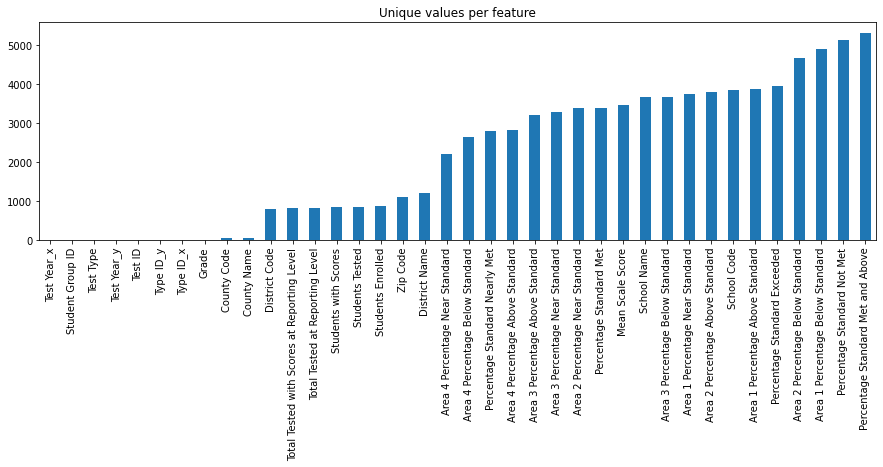

In [202]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

In [203]:
#how many high schools are left? 

df['Grade'].unique()


array([ 6,  7, 11, 13,  3,  4,  5,  8])

In [204]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head()

,count,%
Mean Scale Score,7597.0,26.443663
Area 2 Percentage Below Standard,31.0,0.107905
Area 2 Percentage Above Standard,31.0,0.107905
Area 1 Percentage Below Standard,31.0,0.107905
Area 1 Percentage Near Standard,31.0,0.107905


In [205]:
df[df['Area 2 Percentage Below Standard'].isnull()].sample(4).T

,3154,24314,16217,24813
County Code,9,39,29,39
District Code,73783,68585,10298,68627
School Code,973783,122580,116681,129916
Test Year_x,2021,2021,2021,2021
Student Group ID,1,1,1,1
Test Type,B,B,B,B
Total Tested at Reporting Level,*,7,*,5
Total Tested with Scores at Reporting Level,0,6,*,*
Grade,6,4,7,4
Test ID,English Language Arts/Literacy,Mathematics,English Language Arts/Literacy,Mathematics


In [206]:
df.drop(df[df['Area 2 Percentage Below Standard'].isnull()].index,inplace=True)
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head()

,count,%
Mean Scale Score,7566.0,26.364207
County Code,0.0,0.000000
Area 4 Percentage Above Standard,0.0,0.000000
Area 2 Percentage Above Standard,0.0,0.000000
Area 2 Percentage Near Standard,0.0,0.000000


In [131]:
df.shape

(28698, 38)

In [141]:

for col in df.select_dtypes('object'):
    print(col)
    df[col] = df[col].str.replace('*','')

Test Type
Total Tested at Reporting Level
Total Tested with Scores at Reporting Level
Students Enrolled
Students Tested
Mean Scale Score
Percentage Standard Exceeded
Percentage Standard Met
Percentage Standard Met and Above
Percentage Standard Nearly Met
Percentage Standard Not Met


<ipython-input-141-41532e5d85de>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('*','')


Students with Scores
Area 1 Percentage Above Standard
Area 1 Percentage Near Standard
Area 1 Percentage Below Standard
Area 2 Percentage Above Standard
Area 2 Percentage Near Standard
Area 2 Percentage Below Standard
Area 3 Percentage Above Standard
Area 3 Percentage Near Standard
Area 3 Percentage Below Standard
Area 4 Percentage Above Standard
Area 4 Percentage Near Standard
Area 4 Percentage Below Standard
County Name
District Name
School Name


In [207]:
cols = df.columns[df.dtypes.eq('object')]

convert = cols[:-3]

In [208]:
df[convert] = df[convert].apply(pd.to_numeric,errors='coerce')

In [209]:
df.drop('Test Type' ,inplace=True,axis=1)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28698 entries, 36 to 37976
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   County Code                                  28698 non-null  int64  
 1   District Code                                28698 non-null  int64  
 2   School Code                                  28698 non-null  int64  
 3   Test Year_x                                  28698 non-null  int64  
 4   Student Group ID                             28698 non-null  int64  
 5   Total Tested at Reporting Level              27490 non-null  float64
 6   Total Tested with Scores at Reporting Level  27473 non-null  float64
 7   Grade                                        28698 non-null  int64  
 8   Test ID                                      0 non-null      float64
 9   Students Enrolled                            27037 non-null  float64
 1

In [211]:
df.sample(4).T

,2587,14238,28946,27729
County Code,8,21,45,43
District Code,10082,65458,10454,69419
School Code,830059,6024772,129957,6047112
Test Year_x,2021,2021,2021,2021
Student Group ID,1,1,1,1
Total Tested at Reporting Level,NaN,400.0,84.0,348.0
Total Tested with Scores at Reporting Level,NaN,400.0,84.0,348.0
Grade,11,5,4,5
Test ID,NaN,NaN,NaN,NaN
Students Enrolled,46.0,61.0,11.0,117.0


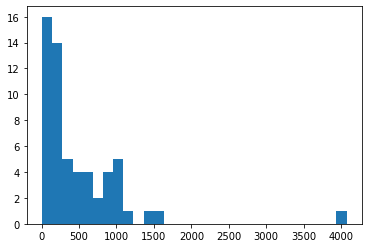

In [217]:
dist_nums = df['County Name'].value_counts()
plt.hist(dist_nums,bins=30)
plt.show()

In [ ]:
## per county reporting school count

In [218]:


df['County Name'].value_counts()

Los Angeles        4072
San Diego          1628
San Joaquin        1366
Santa Clara        1224
Ventura            1085
Stanislaus         1080
Fresno             1059
San Mateo          1015
Tulare             1000
Orange              885
Shasta              869
Sacramento          862
San Bernardino      828
Riverside           694
Kern                694
Alameda             638
Placer              634
Contra Costa        600
Humboldt            583
Marin               515
Sonoma              478
Butte               437
Kings               418
El Dorado           382
Siskiyou            360
Merced              346
Tehama              344
Yuba                300
Sutter              271
Lake                269
Madera              248
San Luis Obispo     246
Mendocino           236
Nevada              235
Imperial            224
Tuolumne            215
Santa Barbara       214
Glenn               201
Lassen              196
Monterey            174
Trinity             164
San Francisco   

Target looks like regression
Showing only top 10 of 26 continuous features


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:58: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 2 outliers in column Area 3 Percentage Above Standard.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Area 4 Percentage Above Standard.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/supervised.py:130: UserWarning: Missing values in target_col have been removed for regression
  warn("Missing values in target_col have been removed for regression",
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:374: UserWarning: 

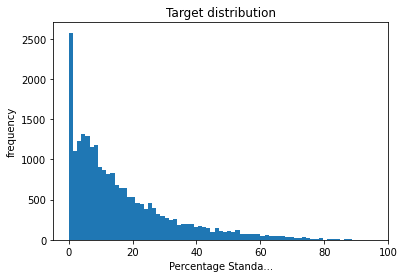

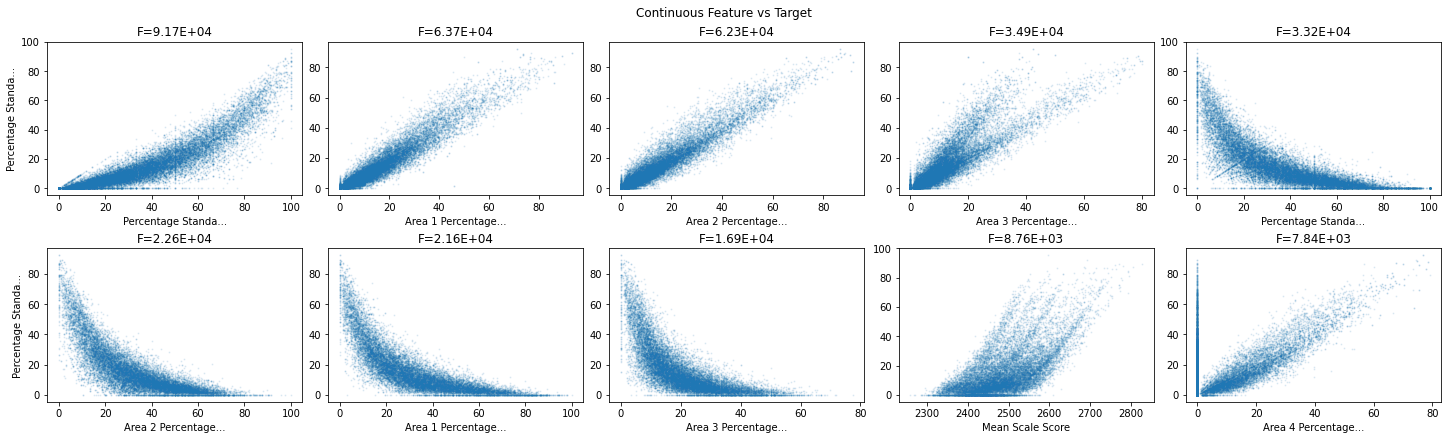

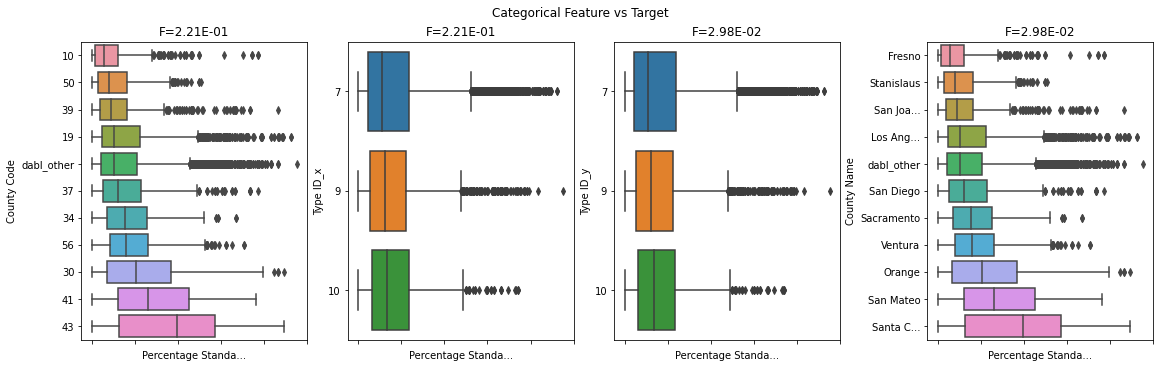

In [219]:
dabl.plot(df, target_col = 'Percentage Standard Exceeded')
plt.show()

In [220]:
df['Students with Scores'].nunique()

835

In [223]:
df['Percentage Standard Exceeded'].nunique() 

3960

In [225]:
df.to_csv('../data/cleaned_labeled_2021-SB_math_ela_scores.csv')

In [229]:
score_means = df.groupby('County Name')[['Percentage Standard Met','Percentage Standard Exceeded']].mean()
score_means.head(10)

,Percentage Standard Met,Percentage Standard Exceeded
County Name,,
Alameda,24.326453,26.593962
Alpine,20.000000,24.285000
Amador,20.012143,10.384286
Butte,24.952086,13.005464
Calaveras,19.639794,10.412577
Colusa,20.291071,8.622500
Contra Costa,22.366193,20.539408
Del Norte,22.212727,13.475000
El Dorado,26.573872,21.241992
